In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data = pd.read_excel(r'/content/drive/MyDrive/ML data /customer_churn_large_dataset.xlsx')
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


## checking the data

In [5]:
data.duplicated() # checking for duplication



0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [7]:
data['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [9]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

# data preprocessing

In [30]:
data.dropna(inplace=True) #Drop rows with missing values

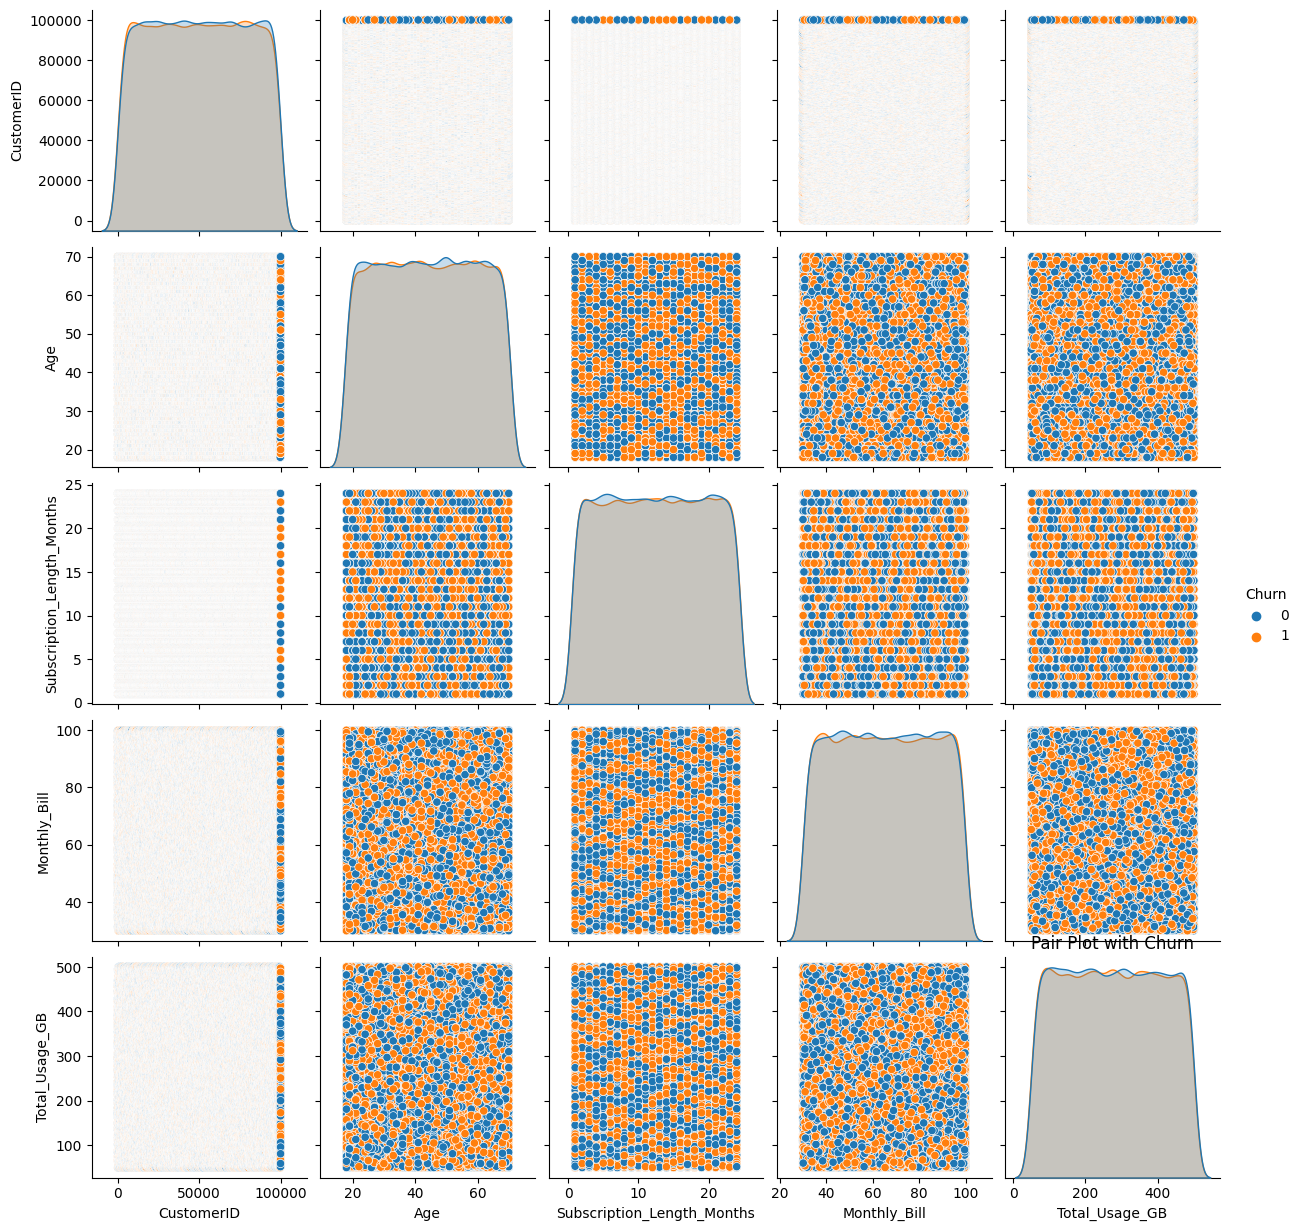

In [11]:

# Create a pair plot with 'Churn' as the hue
sns.pairplot(data, hue='Churn')
plt.title('Pair Plot with Churn')
plt.show()


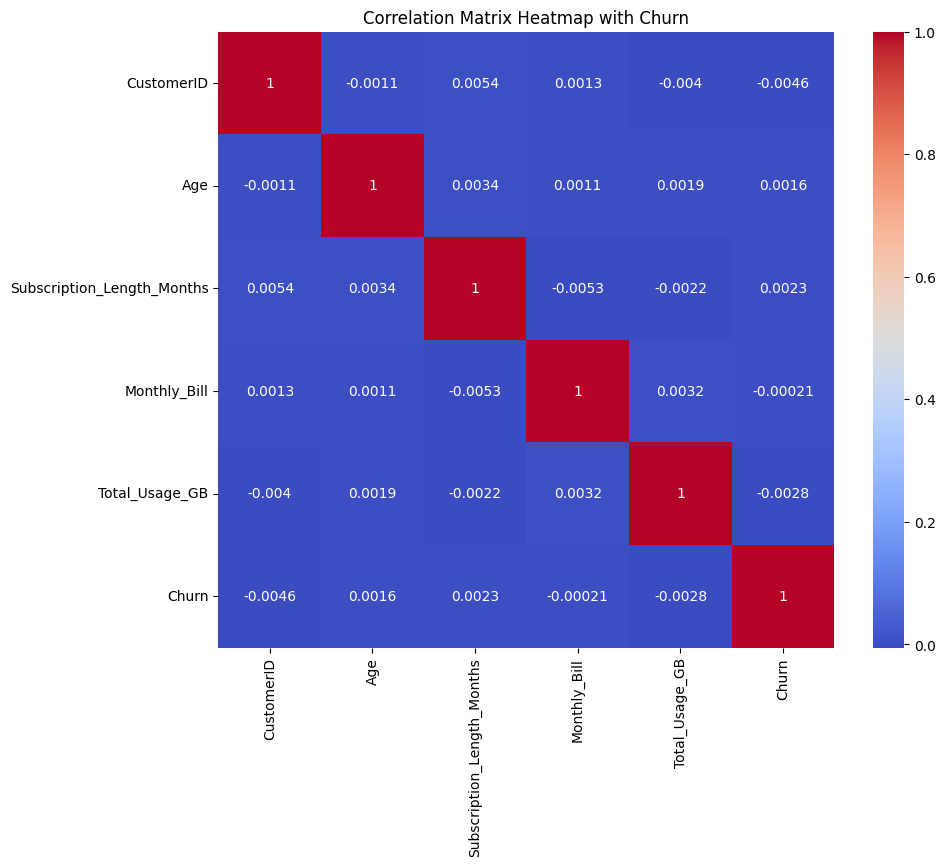

In [2]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt


# data = pd.read_excel(r'/content/drive/MyDrive/ML data /customer_churn_large_dataset.xlsx')


# numeric_columns = data.select_dtypes(include=['number']).columns.tolist()
# numeric_columns.remove('Churn')

# selected_columns = numeric_columns + ['Churn']
# selected_data = data[selected_columns]

# corr_matrix = selected_data.corr()


# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
# plt.title('Correlation Matrix Heatmap with Churn')
# plt.show()


# customerId and names are not importent so droping them

In [5]:
data = pd.read_excel(r'/content/drive/MyDrive/ML data /customer_churn_large_dataset.xlsx')

In [6]:
data=data.drop(['CustomerID','Name'],axis=1)


# encoding non-numeric values to make the dataset suitable for machine learning algorithms

In [34]:
data['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [35]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender']= le.fit_transform(data['Gender'])
data['Location']= le.fit_transform(data['Location'])


In [37]:
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0


## Checking Correlation


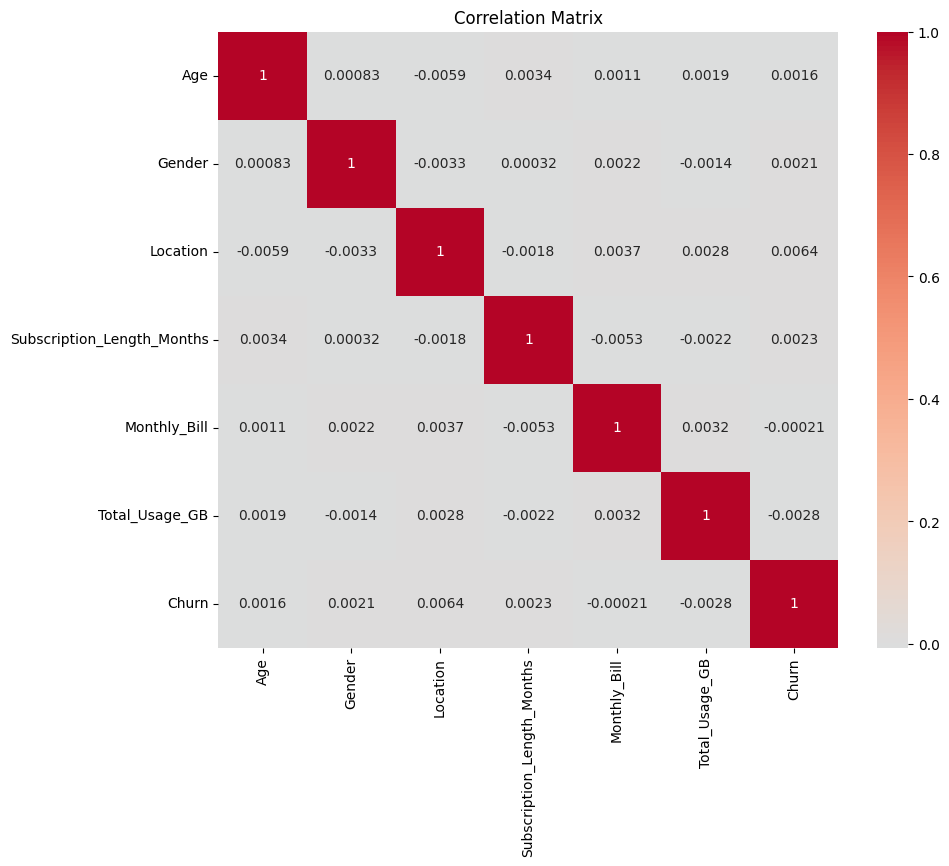

In [24]:

numerical_columns = data.select_dtypes(include=['number']).columns.tolist()


corr_matrix = data[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


### low correlation found  

# checking for outliners

In [48]:
from scipy import stats

z_scores = stats.zscore(data[numerical_columns])
outliers = (z_scores > 3).any(axis=1)

print("Number of outliers:", outliers.sum())

Number of outliers: 0


# Feature engineering

### Creating Age Group Feature:

In [8]:

age_bins = [0, 30, 60, 100]
# age_labels = ['Young', 'Middle', 'old']
age_labels = [1, 2, 3]
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

print(data)


       Age  Gender  Location  Subscription_Length_Months  Monthly_Bill  \
0       63       1         2                          17         73.36   
1       62       0         4                           1         48.76   
2       24       0         2                           5         85.47   
3       36       0         3                           3         97.94   
4       46       0         3                          19         58.14   
...    ...     ...       ...                         ...           ...   
99995   33       1         1                          23         55.13   
99996   62       0         4                          19         61.65   
99997   64       1         0                          17         96.11   
99998   51       0         4                          20         49.25   
99999   27       0         2                          19         76.57   

       Total_Usage_GB  Churn Age_Group  
0                 236      0         3  
1                 172      0 

### Creating Subscription Duration Features:

In [9]:

duration_bins = [0, 6, 12, 24]
# duration_labels = ['Short', 'Medium', 'Long']
duration_labels = ['1', '2', '3']
data['Subscription_Duration'] = pd.cut(data['Subscription_Length_Months'], bins=duration_bins, labels=duration_labels)

print(data)


       Age  Gender  Location  Subscription_Length_Months  Monthly_Bill  \
0       63       1         2                          17         73.36   
1       62       0         4                           1         48.76   
2       24       0         2                           5         85.47   
3       36       0         3                           3         97.94   
4       46       0         3                          19         58.14   
...    ...     ...       ...                         ...           ...   
99995   33       1         1                          23         55.13   
99996   62       0         4                          19         61.65   
99997   64       1         0                          17         96.11   
99998   51       0         4                          20         49.25   
99999   27       0         2                          19         76.57   

       Total_Usage_GB  Churn Age_Group Subscription_Duration  
0                 236      0         3          

### Creating Total Money Spent Feature:

In [10]:

data['Total_Money_Spent'] = data['Subscription_Length_Months'] * data['Monthly_Bill']

print(data)


       Age  Gender  Location  Subscription_Length_Months  Monthly_Bill  \
0       63       1         2                          17         73.36   
1       62       0         4                           1         48.76   
2       24       0         2                           5         85.47   
3       36       0         3                           3         97.94   
4       46       0         3                          19         58.14   
...    ...     ...       ...                         ...           ...   
99995   33       1         1                          23         55.13   
99996   62       0         4                          19         61.65   
99997   64       1         0                          17         96.11   
99998   51       0         4                          20         49.25   
99999   27       0         2                          19         76.57   

       Total_Usage_GB  Churn Age_Group Subscription_Duration  \
0                 236      0         3         

## splitting the data into training and validation sets

In [11]:
X = data.drop('Churn', axis=1)
y = data['Churn']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:
X_train['Age_Group'].unique()

[2, 1, 3]
Categories (3, int64): [1 < 2 < 3]

# testing different models to find the best fit (can ignore this did bunch of testing for myself)

In [93]:
X_train['Age_Group'].unique()

[2, 1, 3]
Categories (3, int64): [1 < 2 < 3]

### Logistic Regression

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)
confusion_mat_logreg = confusion_matrix(y_test, y_pred_logreg)

print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report (Logistic Regression):\n", report_logreg)
print("Confusion Matrix (Logistic Regression):\n", confusion_mat_logreg)


Logistic Regression Accuracy: 0.5024
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.51      0.62      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.50     20000

Confusion Matrix (Logistic Regression):
 [[6236 3843]
 [6109 3812]]


### Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report (Random Forest):\n", report_rf)
print("Confusion Matrix (Random Forest):\n", confusion_mat_rf)


Random Forest Accuracy: 0.4926
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.50      0.51      0.51     10079
           1       0.49      0.47      0.48      9921

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000

Confusion Matrix (Random Forest):
 [[5185 4894]
 [5254 4667]]


### XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("Classification Report (XGBoost):\n", report_xgb)
print("Confusion Matrix (XGBoost):\n", confusion_mat_xgb)


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# List of models to compare
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier()),
    ('SVM', SVC())
]

# Loop over models and perform cross-validation
for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f'{name} - Mean Accuracy: {scores.mean():.4f}, Std Dev: {scores.std():.4f}')


Logistic Regression - Mean Accuracy: 0.5023, Std Dev: 0.0030
Random Forest - Mean Accuracy: 0.4989, Std Dev: 0.0034
XGBoost - Mean Accuracy: 0.5033, Std Dev: 0.0020
SVM - Mean Accuracy: 0.5006, Std Dev: 0.0028


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming you've preprocessed your data and encoded categorical variables



# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate individual models
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

# Create the ensemble model using a VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('logreg', logreg_model), ('rf', rf_model), ('xgb', xgb_model)],
    voting='hard'
)

# Fit and use the ensemble model as you would any other classifier
ensemble_model.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Model Accuracy:", accuracy_ensemble)


Ensemble Model Accuracy: 0.49985


In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import numpy as np

# Instantiate individual models
xgb_model = XGBClassifier()
knn_model = KNeighborsClassifier()

# Create the ensemble model using a VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('knn', knn_model)],
    voting='soft'  # Using 'soft' voting for weighted predictions based on probabilities
)

# Perform cross-validation on the ensemble model and individual models
models = [xgb_model, knn_model, ensemble_model]
model_names = ['XGBClassifier', 'KNeighborsClassifier', 'VotingClassifier']

for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f'{name} - Mean Accuracy: {np.mean(scores):.4f}, Std Dev: {np.std(scores):.4f}')


XGBClassifier - Mean Accuracy: 0.5023, Std Dev: 0.0038
KNeighborsClassifier - Mean Accuracy: 0.4998, Std Dev: 0.0040
VotingClassifier - Mean Accuracy: 0.4998, Std Dev: 0.0044


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your data
# ...

# Assuming you have loaded your data into the 'data' DataFrame

# Define categorical columns
categorical_columns = ['Age_Group', 'Subscription_Duration']

# Encode categorical columns using one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(data[categorical_columns])

# Combine encoded features with the rest of the data
data_encoded = pd.concat([data.drop(categorical_columns, axis=1), pd.DataFrame(encoded_features)], axis=1)

# Convert all column names to string type
data_encoded.columns = data_encoded.columns.astype(str)

# Split the data into features (X) and target (y)
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_scaled)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.49755
Precision: 0.49336512544059713
Recall: 0.47968954742465475
F1-Score: 0.4864312362651403


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate individual models
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()

# Create the ensemble model using a VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('logreg', logreg_model),
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('svm', svm_model),
        ('knn', knn_model)
    ],
    voting='hard'  # You can use 'soft' for weighted voting based on predicted probabilities
)

# Train models
models = {
    'Logistic Regression': logreg_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'SVM': svm_model,
    'KNN': knn_model,
    'Ensemble': ensemble_model
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1])

# Create a pandas DataFrame to display results
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df = pd.DataFrame(results, columns=columns)

print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression   0.49450   0.493810  0.759903  0.598618
1        Random Forest   0.50245   0.498471  0.492793  0.495616
2              XGBoost   0.50105   0.497457  0.571717  0.532008
3                  SVM   0.49920   0.494971  0.471223  0.482805
4                  KNN   0.50200   0.498081  0.510130  0.504033
5             Ensemble   0.50190   0.498279  0.598125  0.543656


## testing without 'Age' , 'Subscription_Length_Months

In [119]:
data=data.drop(['Age','Subscription_Length_Months'],axis=1)

In [120]:
print(data)

       Gender  Location  Monthly_Bill  Total_Usage_GB  Churn  \
0           1         2         73.36             236      0   
1           0         4         48.76             172      0   
2           0         2         85.47             460      0   
3           0         3         97.94             297      1   
4           0         3         58.14             266      0   
...       ...       ...           ...             ...    ...   
99995       1         1         55.13             226      1   
99996       0         4         61.65             351      0   
99997       1         0         96.11             251      1   
99998       0         4         49.25             434      1   
99999       0         2         76.57             173      1   

       Total_Money_Spent Age_Group Subscription_Duration  
0                1247.12         3                     3  
1                  48.76         3                     1  
2                 427.35         1                    

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate individual models
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()

# Create the ensemble model using a VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('logreg', logreg_model),
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('svm', svm_model),
        ('knn', knn_model)
    ],
    voting='hard'  # You can use 'soft' for weighted voting based on predicted probabilities
)

# Train models
models = {
    'Logistic Regression': logreg_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'SVM': svm_model,
    'KNN': knn_model,
    'Ensemble': ensemble_model
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1])

# Create a pandas DataFrame to display results
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df = pd.DataFrame(results, columns=columns)

print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression   0.50240   0.497975  0.384235  0.433773
1        Random Forest   0.49275   0.488494  0.479286  0.483846
2              XGBoost   0.50400   0.500052  0.481101  0.490394
3                  SVM   0.49660   0.491635  0.435440  0.461835
4                  KNN   0.49910   0.495089  0.492793  0.493938
5             Ensemble   0.49620   0.491046  0.428384  0.457580


# Results- although performance of all the models is quite similar but XGBoost gave slight better results(without 'Age' and 'Subscription_Length_Months') , therefore moving forward with XGBoost

# best result- XGBoost without without 'Age' and 'Subscription_Length_Months'

In [11]:
data=data.drop(['Age','Subscription_Length_Months'],axis=1)

In [12]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
X_train['Age_Group'] = label_encoder.fit_transform(X_train['Age_Group'])
X_train['Subscription_Duration'] = label_encoder.fit_transform(X_train['Subscription_Duration'])
X_train['Gender'] = label_encoder.fit_transform(X_train['Gender'])
X_train['Location'] = label_encoder.fit_transform(X_train['Location'])

X_test['Age_Group'] = label_encoder.transform(X_test['Age_Group'])
X_test['Subscription_Duration'] = label_encoder.transform(X_test['Subscription_Duration'])
X_test['Gender'] = label_encoder.transform(X_test['Gender'])
X_test['Location'] = label_encoder.transform(X_test['Location'])

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("Classification Report (XGBoost):\n", report_xgb)
print("Confusion Matrix (XGBoost):\n", confusion_mat_xgb)

# Save the trained model, label encoder, and scaler to files
model_filename = 'xgboost_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(xgb_model, file)

label_encoder_filename = 'label_encoder.pkl'
with open(label_encoder_filename, 'wb') as file:
    pickle.dump(label_encoder, file)

scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)


XGBoost Accuracy: 0.50105
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.51      0.43      0.47     10079
           1       0.50      0.57      0.53      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Confusion Matrix (XGBoost):
 [[4349 5730]
 [4249 5672]]


# Hyperparameter tuning

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_model = xgb.XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_xgb_model = grid_search.best_estimator_
y_pred_best = best_xgb_model.predict(X_test_scaled)


# cross validation

In [18]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: Accuracy = {score:.4f}")

# Calculate the mean and standard deviation of the scores
mean_accuracy = cv_scores.mean()
std_dev_accuracy = cv_scores.std()

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Std Deviation of Accuracy: {std_dev_accuracy:.4f}")


Fold 1: Accuracy = 0.5084
Fold 2: Accuracy = 0.4971
Fold 3: Accuracy = 0.5034
Fold 4: Accuracy = 0.5039
Fold 5: Accuracy = 0.4998
Mean Accuracy: 0.5025
Std Deviation of Accuracy: 0.0039


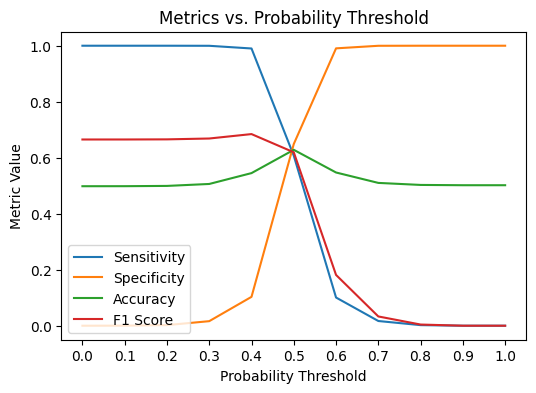

In [16]:
from sklearn.metrics import confusion_matrix, f1_score

train_probabilities = xgb_model.predict_proba(X_train_scaled)[:, 1]

thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train, train_predictions))

plt.figure(figsize=(6, 4))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Probability Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Threshold')
plt.legend(loc='lower left')
plt.show()


In [20]:
import joblib


joblib.dump(xgb_model, 'customer_churn_xgb.pkl')

['customer_churn_xgb.pkl']